<a href="https://colab.research.google.com/github/ebudd45/Meteorologyclass/blob/main/Meteorgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving OKK.csv to OKK.csv


In [ ]:
#input date and station
station=input('Input station id: ')
date=input('Input date in YYYMMDD format: ')

Input station id: OKK
Input date in YYYMMDD format: 20131117


In [ ]:
dt=datetime.strptime(date, '%Y%m%d')
print(dt)

2013-11-17 00:00:00


In [ ]:
#set up time data
date1=dt-timedelta(minutes=10)
date2=dt+timedelta(hours=24)-timedelta(minutes=10)

In [ ]:
#read in a and print out data in more readable and aesthetic format

import io
data=pd.read_csv((io.BytesIO(uploaded['OKK.csv'])), usecols=[0,1,2,3,4,5, 6, 7 ,8,9,11], index_col=1, parse_dates=True)
print(data)

                    station  tmpf  dwpf   relh   drct  sknt  p01i   alti mslp  \
valid                                                                           
2013-11-16 00:15:00     OKK  44.6  28.4  52.72  190.0   6.0  0.00  30.03    M   
2013-11-16 00:35:00     OKK  46.4  28.4  49.24  200.0   6.0  0.00  30.04    M   
2013-11-16 00:55:00     OKK  44.6  28.4  52.72  180.0   5.0  0.00  30.04    M   
2013-11-16 01:15:00     OKK  44.6  30.2  56.74  180.0   7.0  0.00  30.04    M   
2013-11-16 01:35:00     OKK  42.8  30.2  60.79  190.0   8.0  0.00  30.04    M   
...                     ...   ...   ...    ...    ...   ...   ...    ...  ...   
2013-11-17 18:55:00     OKK  62.6  57.2  82.50  190.0  25.0  0.00  29.42    M   
2013-11-17 19:15:00     OKK  62.6  57.2  82.50  190.0  21.0  0.00  29.41    M   
2013-11-17 19:35:00     OKK  62.6  59.0  88.00  190.0  15.0  0.02  29.41    M   
2013-11-17 19:55:00     OKK  62.6  57.2  82.50  180.0  20.0  0.03  29.37    M   
2013-11-17 20:15:00     OKK 

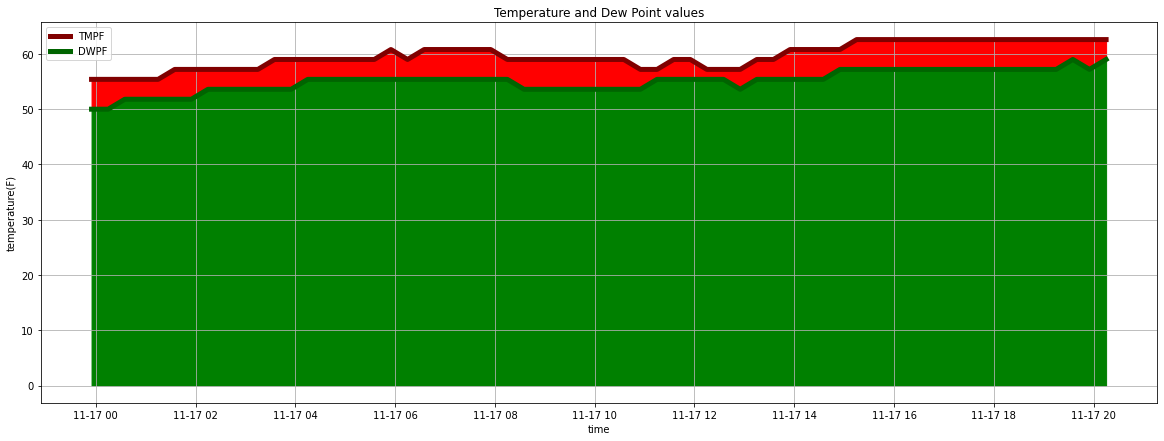

In [ ]:
#generate temp/dew point meteogram

plt.figure(1,figsize = (20,7))

plt.plot(data.loc[date1:date2].index, data.loc[date1:date2].tmpf, color ='maroon', linewidth=5, label = 'TMPF')
plt.plot(data.loc[date1:date2].index, data.loc[date1:date2].dwpf, color ='darkgreen', linewidth=5, label = 'DWPF')

plt.xlabel('time')
plt.ylabel('temperature(F)')

plt.fill_between(data.loc[date1:date2].index, data.loc[date1:date2].tmpf, data.loc[date1:date2].dwpf,  color ='red')
plt.fill_between(data.loc[date1:date2].index,data.loc[date1:date2].dwpf,0,color='green')
                 
plt.legend()
plt.title('Temperature and Dew Point values')
plt.grid()
plt.show()

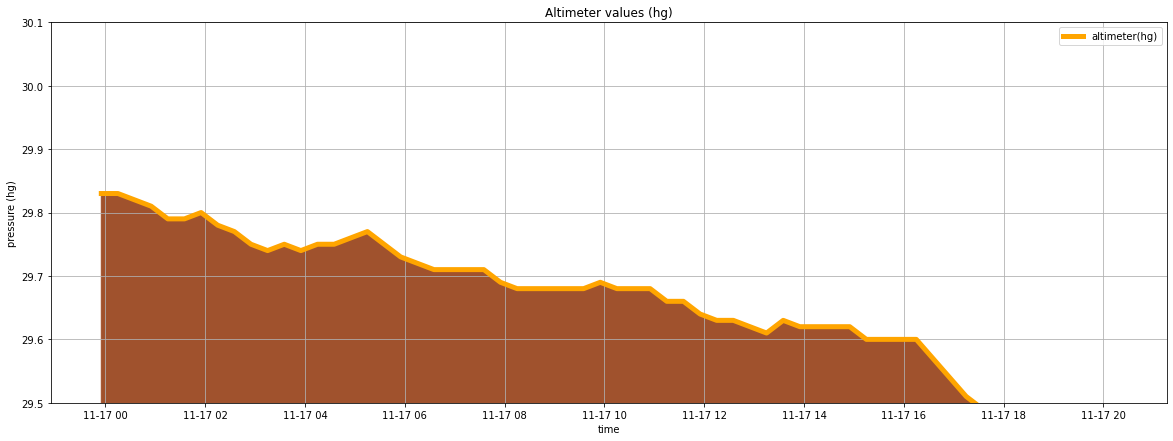

In [ ]:
#generate altimeter meteogram

plt.figure(1,figsize = (20,7))

plt.plot(data.loc[date1:date2].index, data.loc[date1:date2].alti, color ='orange', linewidth=5, label = 'altimeter(hg)')
plt.fill_between(data.loc[date1:date2].index,data.loc[date1:date2].alti,0,color='sienna')

plt.ylim(29.5, 30.1)
plt.xlabel('time')
plt.ylabel('pressure (hg)')

plt.legend()
plt.title('Altimeter values (hg)')
plt.grid()
plt.show()

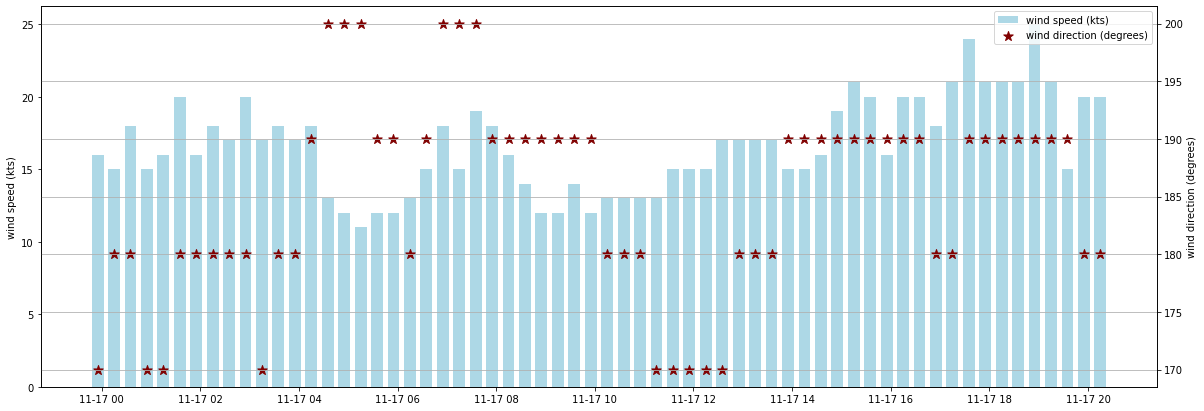

In [ ]:
#generate wind meteogram

plt.figure(3,figsize=(20,7))

plt1=plt.subplot()

b1=plt1.bar(data.loc[date1:date2].index, data.loc[date1:date2].sknt, color='lightblue', label = 'Wind speed (knt)', align ='center', width=0.01)

plt2=plt1.twinx()

s1=plt2.scatter(data.loc[date1:date2].index, data.loc[date1:date2].drct, s=100, color='maroon', marker='*', label = 'wind direction (degrees)') 

plt1.set_ylabel('wind speed (kts)')
plt2.set_ylabel('wind direction (degrees)')

plt.legend([b1,s1],['wind speed (kts)', 'wind direction (degrees)'])
plt.grid()
plt.show()

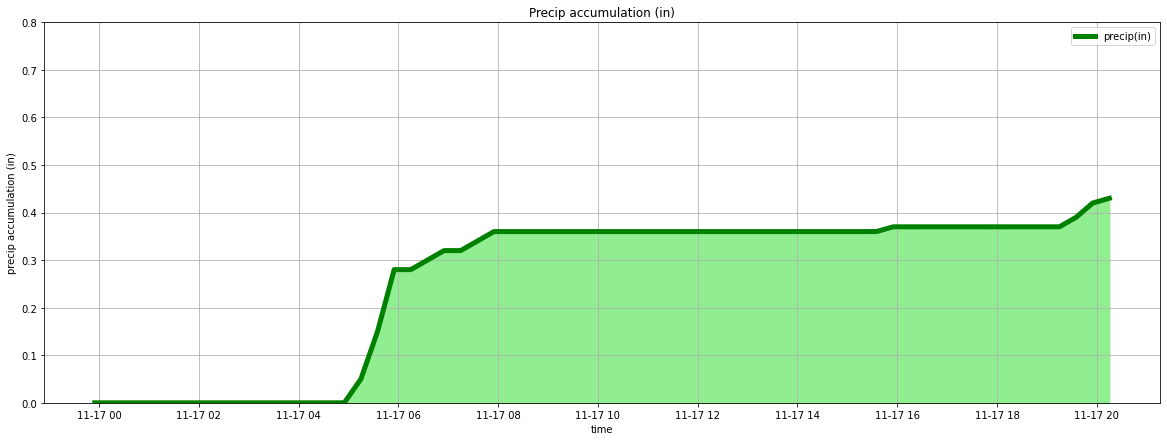

In [ ]:
#generate precip meteogram

plt.figure(1,figsize = (20,7))

plt.plot(data.loc[date1:date2].index, np.cumsum(data.loc[date1:date2].p01i), color ='green', linewidth=5, label = 'precip(in)')
plt.fill_between(data.loc[date1:date2].index, np.cumsum(data.loc[date1:date2].p01i),0,color='lightgreen')


plt.ylim(0,0.8)
plt.xlabel('time')
plt.ylabel('precip accumulation (in)')

plt.legend()
plt.title('Precip accumulation (in)')
plt.grid()
plt.show()

In [ ]:
#temperature stats
print(f'Daily Statistics for {station} on {dt}')
print()
print('Statistics for Temperature')

max=np.max(data.loc[date1:date2].tmpf)
time_max=np.where(data.loc[date1:date2].tmpf==max)[0][0]
where_max=(data.loc[date1:date2].tmpf.index[time_max])

min=np.min(data.loc[date1:date2].tmpf)
time_min=np.where(data.loc[date1:date2].tmpf==min)[0][0]
where_min=(data.loc[date1:date2].tmpf.index[time_min])

tmpf_avr=np.average(data.loc[date1:date2].tmpf)

print(f'Max temp: {max} F at {where_max}')
print(f'Min temp: {min} F at {where_min}')
print(f'Average temp: {tmpf_avr} F ')

Daily Statistics for OKK on 2013-11-17 00:00:00

Statistics for Temperature
Max temp: 62.6 F at 2013-11-17 15:15:00
Min temp: 55.4 F at 2013-11-16 23:55:00
Average temp: 59.609677419354824 F 


In [ ]:
#dew point stats

print('Statistics for dew point')
max=np.max(data.loc[date1:date2].dwpf)
time_max=np.where(data.loc[date1:date2].dwpf==max)[0][0]
where_max=(data.loc[date1:date2].dwpf.index[time_max])

min=np.min(data.loc[date1:date2].dwpf)
time_min=np.where(data.loc[date1:date2].dwpf==min)[0][0]
where_min=(data.loc[date1:date2].dwpf.index[time_min])

dwpf_avr=np.average(data.loc[date1:date2].dwpf)

print(f'Max dew point: {max} F at {where_max}')
print(f'Min dew point: {min} F at {where_min}')
print(f'Average dew point: {dwpf_avr} F ')

Statistics for dew point
Max dew point: 59.0 F at 2013-11-17 19:35:00
Min dew point: 50.0 F at 2013-11-16 23:55:00
Average dew point: 55.05161290322579 F 


In [ ]:
# #altimeter stats
print('Statistics for altimeter')

max=np.max(data.loc[date1:date2].alti)
time_max=np.where(data.loc[date1:date2].alti==max)[0][0]
where_max=(data.loc[date1:date2].alti.index[time_max])

min=np.min(data.loc[date1:date2].alti)
time_min=np.where(data.loc[date1:date2].alti==min)[0][0]
where_min=(data.loc[date1:date2].alti.index[time_min])

alti_avr=np.average(data.loc[date1:date2].alti)

print(f'Max pressure: {max} Hg at {where_max}')
print(f'Min pressure: {min} hg at {where_min}')
print(f'Average pressure: {alti_avr} Hg ')

Statistics for altimeter
Max pressure: 29.83 Hg at 2013-11-16 23:55:00
Min pressure: 29.34 hg at 2013-11-17 20:15:00
Average pressure: 29.65306451612903 Hg 


In [ ]:
#wind stats
print('Statistics for wind')

max=np.max(data.loc[date1:date2].sknt)
time_max=np.where(data.loc[date1:date2].sknt==max)[0][0]
where_max=(data.loc[date1:date2].sknt.index[time_max])
dir_max=(data.loc[where_max].drct)

min=np.min(data.loc[date1:date2].sknt)
time_min=np.where(data.loc[date1:date2].sknt==min)[0][0]
where_min=(data.loc[date1:date2].sknt.index[time_min])
dir_min=(data.loc[where_min].drct)

sknt_avr=np.average(data.loc[date1:date2].sknt)
print(f'max: {max} kts at {where_max}')
print(f'max wind from {dir_max} deg')
print(f'min: {min} kts at {where_min}')
print(f'min wind from {dir_min} deg')
print(f'average: {sknt_avr} kts')

Statistics for wind
max: 25.0 kts at 2013-11-17 18:55:00
max wind from 190.0 deg
min: 11.0 kts at 2013-11-17 05:15:00
min wind from 200.0 deg
average: 16.661290322580644 kts


In [ ]:
#precip stats
print('Statistics for precip')

sum_precip=np.sum(data.loc[date1:date2].p01i)
print(f'Precipitation Accumulation: {sum_precip} in')

tmpf_less_32=data.loc[date1:date2].tmpf<32
tmpf_more_32=data.loc[date1:date2].tmpf>32
#data.loc[date1:date2].tmpf[tmpf_less_32].count()
#data.loc[date1:date2].tmpf[tmpf_more_32].count()

print(f'number of hours under 32 F: {data.loc[date1:date2].tmpf[tmpf_less_32].count()}')
print(f'number of hours over 32 F: {data.loc[date1:date2].tmpf[tmpf_more_32].count()}')

Statistics for precip
Precipitation Accumulation: 0.43000000000000005 in
number of hours under 32 F: 0
number of hours over 32 F: 62
